In [1]:
import numpy as np # linear algebra
import pandas as pd


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
import warnings
warnings.filterwarnings("ignore")


## Load your dataset

In [4]:
data = pd.read_csv("../DataSet/powerconsumption.csv")


### Look at Dataset

In [5]:
data.sample(5)


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
28714,7/19/2017 9:40,29.55,32.55,4.919,595.600,51.150,36849.96678,25602.53165,27576.90377
41534,10/16/2017 10:20,22.76,76.60,0.104,358.400,143.500,35965.33917,22649.37759,11414.95441
44666,11/7/2017 4:20,19.77,76.30,0.068,0.048,0.119,21796.92308,17140.90909,10207.22892
18988,5/12/2017 20:40,18.73,84.20,0.072,0.069,0.126,45249.04918,25995.04644,25628.50202
12987,4/1/2017 4:30,16.40,84.10,0.071,0.022,0.167,25334.07966,12479.02240,14900.36364


#### Converting  'Datetime' column to datetime

In [6]:
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%m/%d/%Y %H:%M', dayfirst=True)


Set the 'Dates' column as the index

In [7]:
data.set_index('Datetime', inplace=True)


In [8]:
data['TotalPowerConsumption']= data['PowerConsumption_Zone1'] + data['PowerConsumption_Zone2'] + data['PowerConsumption_Zone3']


In [9]:
data= data.drop(['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3'],axis=1)


## Checking for Missing values

In [10]:
data.isnull().sum()


Temperature              0
Humidity                 0
WindSpeed                0
GeneralDiffuseFlows      0
DiffuseFlows             0
TotalPowerConsumption    0
dtype: int64

## Checking for Outliers

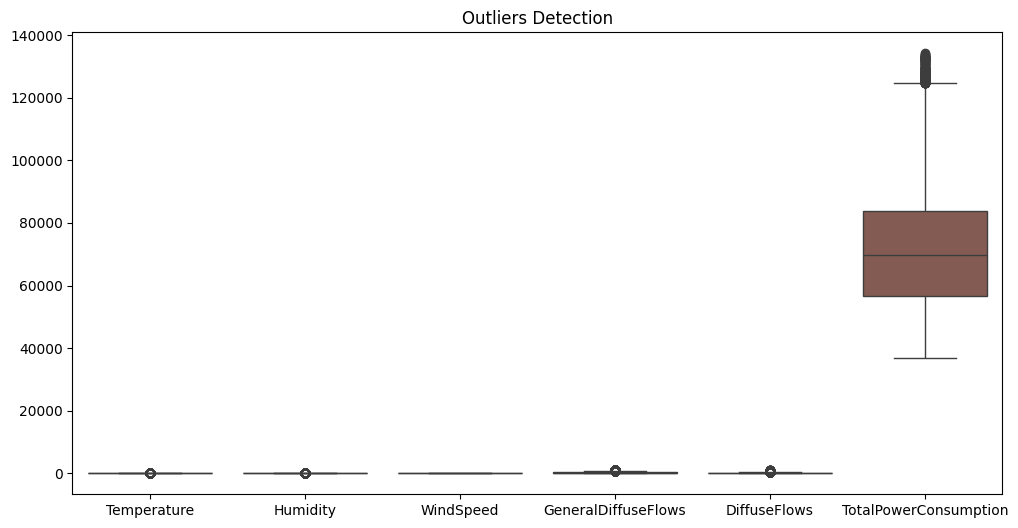

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data)
plt.title('Outliers Detection')
plt.show()


Some Outliers found. Lets remove them

In [12]:
RS = RobustScaler()


In [13]:
x = data.drop(['TotalPowerConsumption'],axis=1)
y = data['TotalPowerConsumption']


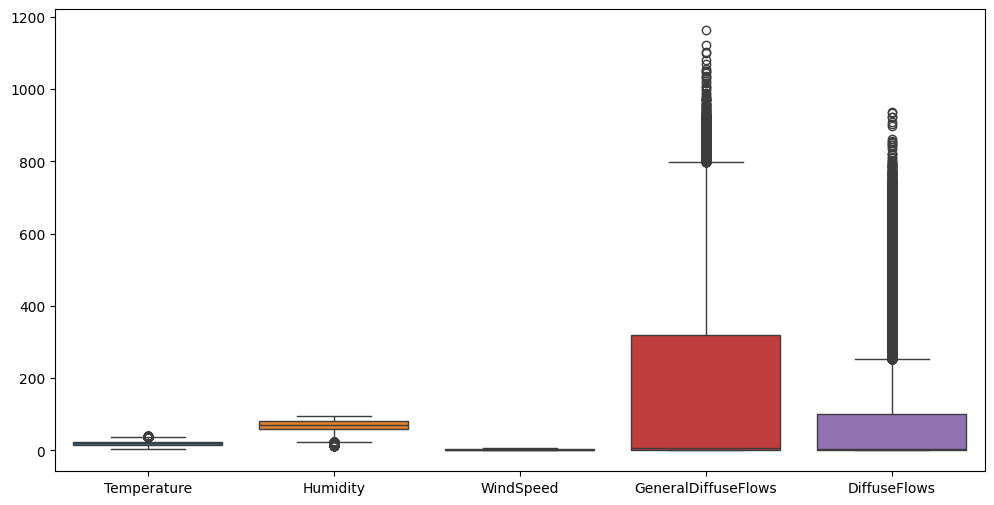

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x)
plt.show()


In [15]:
scaled_x = RS.fit_transform(x)


In [16]:
x= pd.DataFrame(scaled_x, columns=x.columns)


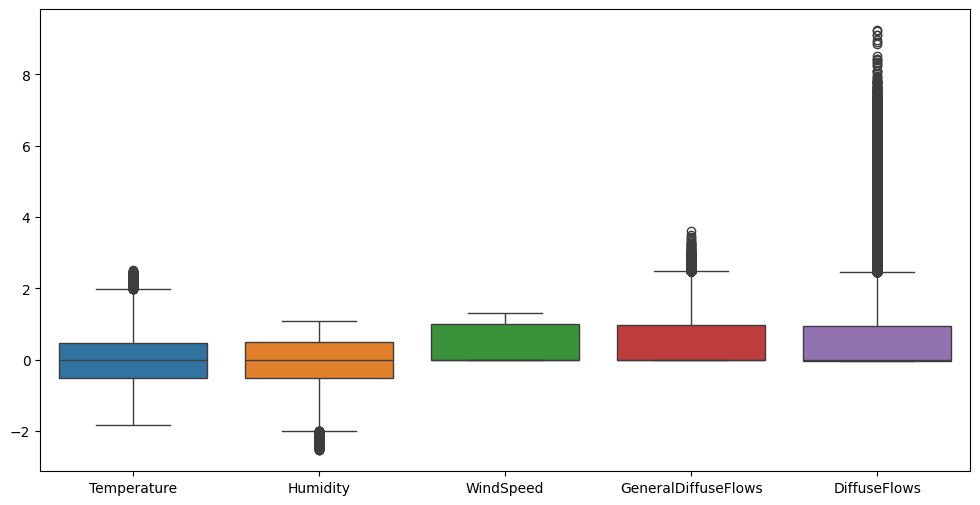

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x)
plt.show()


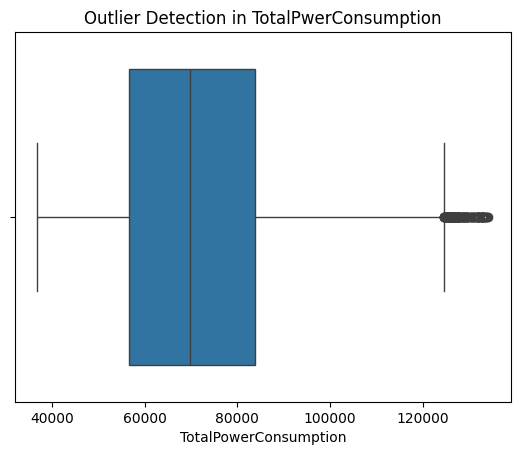

In [18]:
sns.boxplot(x='TotalPowerConsumption',data=data)
plt.title('Outlier Detection in TotalPwerConsumption')
plt.show()


In [19]:
Q1 = data['TotalPowerConsumption'].quantile(0.25)
Q3 = data['TotalPowerConsumption'].quantile(0.75)

IQR = Q3 - Q1

lowerbound = Q1 - (1.5 * IQR)
upperbound = Q3 + (1.5 * IQR)

data = data[(data.TotalPowerConsumption >= lowerbound) & (data.TotalPowerConsumption <= upperbound)]


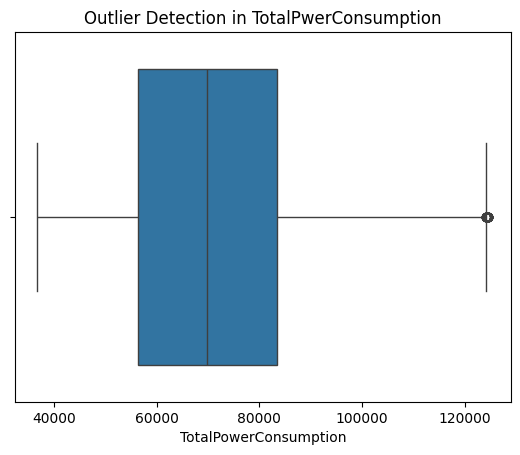

In [20]:
sns.boxplot(x='TotalPowerConsumption',data=data)
plt.title('Outlier Detection in TotalPwerConsumption')
plt.show()


## Checking and Fixing Data Distribution

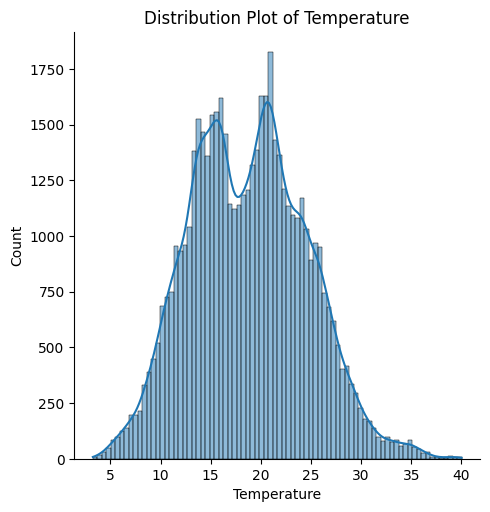

In [21]:
sns.displot(data['Temperature'], kde=True)
plt.title('Distribution Plot of Temperature')
plt.show()


In [22]:
data['Temperature'].skew()


0.19847847347894332

In [23]:
from scipy.stats import boxcox
data['Temperature'], lambda_boxcox = boxcox(data['Temperature'])


In [24]:
data['Temperature'].skew()


-0.028399651548740912

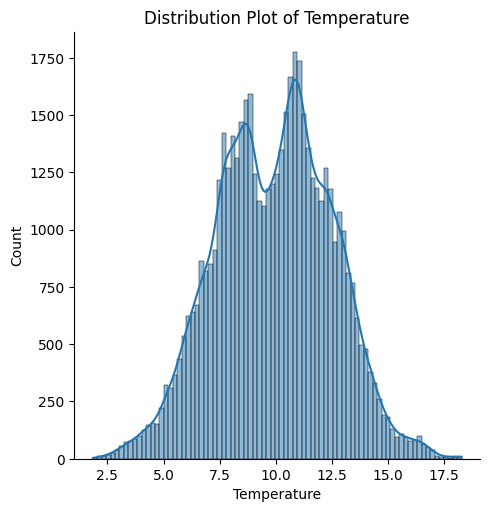

In [25]:
sns.displot(data['Temperature'], kde=True)
plt.title('Distribution Plot of Temperature')
plt.show()


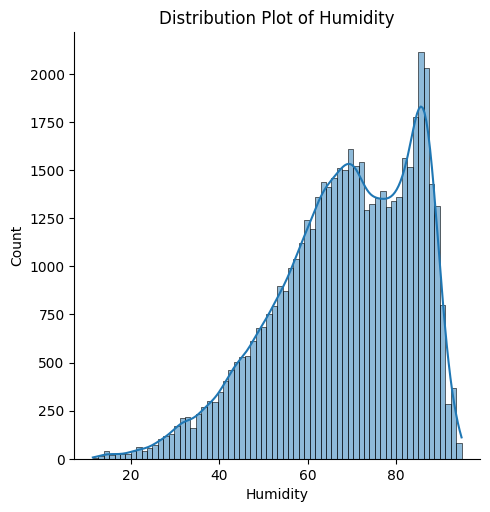

In [26]:
sns.displot(data['Humidity'], kde=True) 
plt.title('Distribution Plot of Humidity')
plt.show()


In [27]:
data['Humidity'].skew()


-0.6267255308810648

In [28]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
data['Humidity'] = pt.fit_transform(data[['Humidity']])


In [29]:
data['Humidity'].skew()


-0.16303592371905884

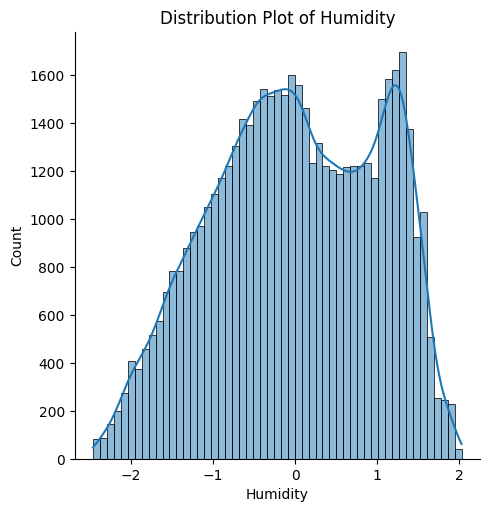

In [30]:
sns.displot(data['Humidity'], kde=True) 
plt.title('Distribution Plot of Humidity')
plt.show()


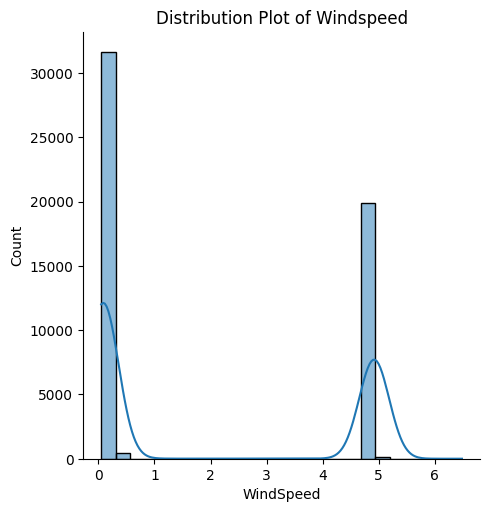

In [31]:
sns.displot(data['WindSpeed'], kde=True) 
plt.title('Distribution Plot of Windspeed')
plt.show()


In [32]:
data['WindSpeed'].skew()


0.4692908180744133

In [33]:
from scipy.stats import boxcox
data['WindSpeed'], lambda_boxcox = boxcox(data['WindSpeed'])


In [34]:
data['WindSpeed'].skew()


0.38736112281085533

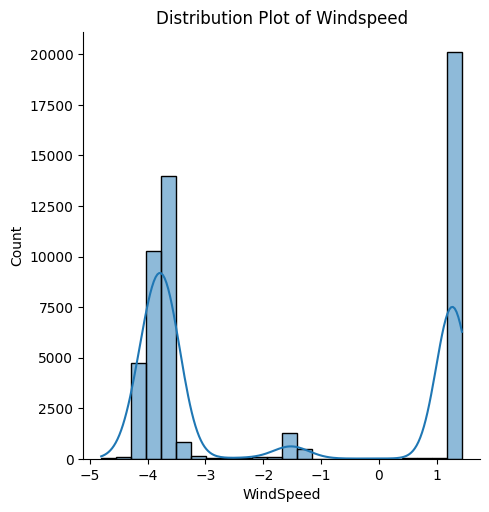

In [35]:
sns.displot(data['WindSpeed'], kde=True) 
plt.title('Distribution Plot of Windspeed')
plt.show()


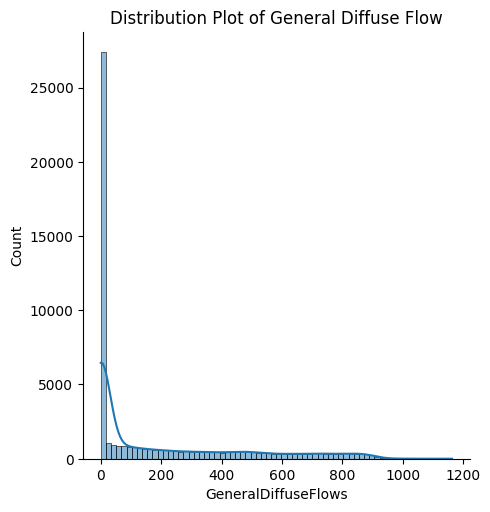

In [36]:
sns.displot(data['GeneralDiffuseFlows'], kde=True) 
plt.title('Distribution Plot of General Diffuse Flow')
plt.show()


In [37]:
data['GeneralDiffuseFlows'].skew()


1.3027028537291285

In [38]:
data['GeneralDiffuseFlows'], lambda_boxcox = boxcox(data['GeneralDiffuseFlows'])


In [39]:
data['GeneralDiffuseFlows'].skew()


0.03755923507138737

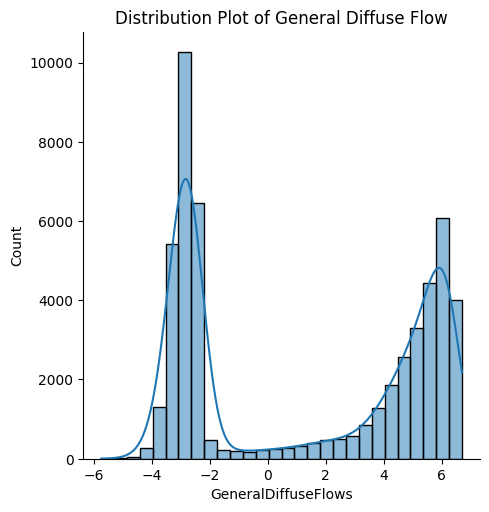

In [40]:
sns.displot(data['GeneralDiffuseFlows'], kde=True) 
plt.title('Distribution Plot of General Diffuse Flow')
plt.show()


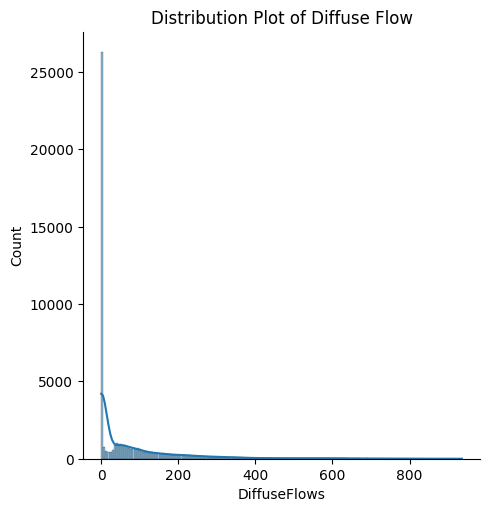

In [41]:
sns.displot(data['DiffuseFlows'], kde=True) 
plt.title('Distribution Plot of Diffuse Flow')
plt.show()


In [42]:
data['DiffuseFlows'].skew()


2.4524126239824557

In [43]:
data['DiffuseFlows'], lambda_boxcox = boxcox(data['DiffuseFlows'])


In [44]:
data['DiffuseFlows'].skew()


0.05059341906012307

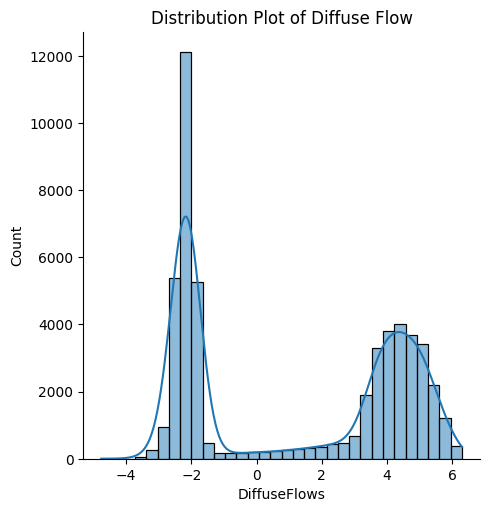

In [45]:
sns.displot(data['DiffuseFlows'], kde=True) 
plt.title('Distribution Plot of Diffuse Flow')
plt.show()


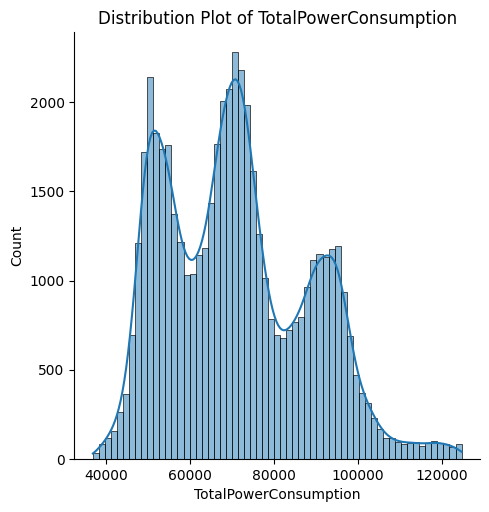

In [46]:
sns.displot(data['TotalPowerConsumption'], kde=True) 
plt.title('Distribution Plot of TotalPowerConsumption')
plt.show()


In [47]:
data['TotalPowerConsumption'].skew()


0.4640428873892331

In [48]:
data['TotalPowerConsumption'], lambda_boxcox = boxcox(data['TotalPowerConsumption'])


In [49]:
data['TotalPowerConsumption'].skew()


0.0024978677955878386

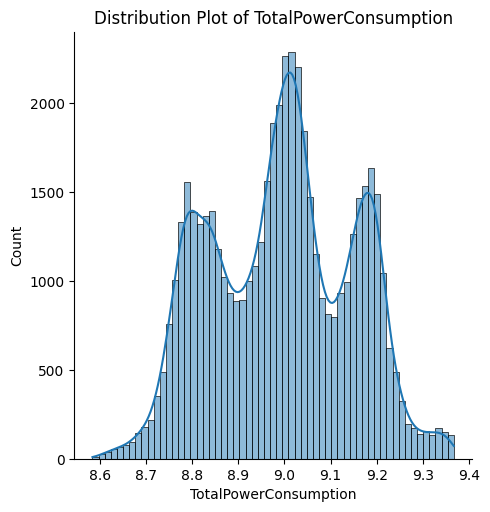

In [50]:
sns.displot(data['TotalPowerConsumption'], kde=True) 
plt.title('Distribution Plot of TotalPowerConsumption')
plt.show()


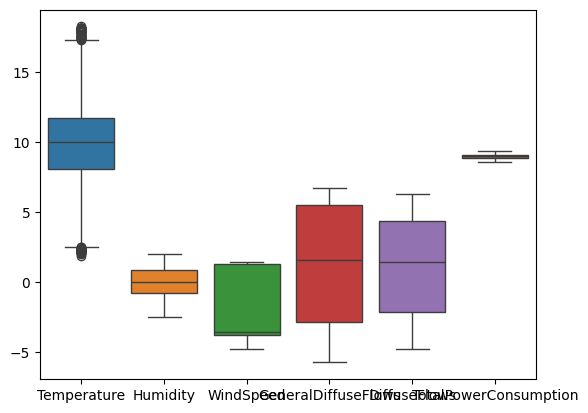

In [51]:
sns.boxplot(data)
plt.show()


In [52]:
x= data.drop(['TotalPowerConsumption'],axis=1)
y=data['TotalPowerConsumption']


## Scaling

In [53]:
Scaler = StandardScaler()


In [54]:
x_scaled = Scaler.fit_transform(x) 


In [55]:
x_scaled


array([[-2.32460743,  0.27732793, -0.78328632, -1.0575885 , -1.01169204],
       [-2.35805137,  0.32903512, -0.78328632, -0.97661612, -1.11990659],
       [-2.38147306,  0.32903512, -0.81477459, -1.00760372, -1.06752738],
       ...,
       [-2.24676709,  0.2042515 , -0.75323729, -0.93016651, -1.16473634],
       [-2.27904637,  0.21879231, -0.81477459, -0.99163325, -1.10506474],
       [-2.31978123,  0.29943234, -0.80411107, -1.00760372, -1.03400165]])

In [56]:
x_scaled.shape


(52266, 5)

In [57]:
y.shape


(52266,)

In [58]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)


#### AdFuller Report

In [59]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_train)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -205.03155688103394
p-value: 0.0


## ARIMA

In [60]:
import pmdarima as pm
auto_model = pm.auto_arima(y_train, seasonal=False, trace=True,error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=12.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=302339.873, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=1.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=246367.063, Time=3.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=10.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=199287.976, Time=4.93 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=13.56 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=162719.259, Time=6.81 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=27.33 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=135383.162, Time=25.14 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-35585.021, Time=45.34 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=51.84 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=53.38 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=114097.749, Time=14.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf

In [61]:
auto_model.fit(y_train)


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [62]:
arima_pred = auto_model.predict(n_periods=len(y_test))


In [63]:
print(auto_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                41812
Model:                        SARIMAX   Log Likelihood               19525.522
Date:                Tue, 28 Jan 2025   AIC                         -39047.044
Time:                        19:30:23   BIC                         -39029.762
Sample:                             0   HQIC                        -39041.585
                              - 41812                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.9922      0.001   1.21e+04      0.000       8.991       8.994
sigma2         0.0230      0.000    112.944      0.000       0.023       0.023
Ljung-Box (L1) (Q):                   0.31   Jarque-

In [64]:
mse = mean_squared_error(y_test, arima_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.02314263335566485


## SRIMAX

In [65]:
auto_model = pm.auto_arima(y_train,seasonal=True, m=24,trace=True, error_action='ignore',suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-39047.044, Time=4.50 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=161.00 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-39043.389, Time=27.96 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=302339.873, Time=0.50 sec
 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=94.71 sec
 ARIMA(0,0,0)(0,0,1)[24] intercept   : AIC=-39045.082, Time=23.34 sec
 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=-39045.352, Time=7.34 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=-39045.349, Time=2.47 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=-39043.352, Time=9.49 sec

Best model:  ARIMA(0,0,0)(0,0,0)[24] intercept
Total fit time: 522.887 seconds


In [66]:
auto_model.fit(y_train)


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 24),
      suppress_warnings=True)

In [67]:
sarimax_pred = auto_model.predict(n_periods=len(y_test))


In [68]:
print(auto_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                41812
Model:                        SARIMAX   Log Likelihood               19525.522
Date:                Tue, 28 Jan 2025   AIC                         -39047.044
Time:                        19:39:20   BIC                         -39029.762
Sample:                             0   HQIC                        -39041.585
                              - 41812                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.9922      0.001   1.21e+04      0.000       8.991       8.994
sigma2         0.0230      0.000    112.944      0.000       0.023       0.023
Ljung-Box (L1) (Q):                   0.31   Jarque-

In [69]:
mse = mean_squared_error(y_test, sarimax_pred)
print(f'Mean Squared Error (SARIMAX): {mse}')


Mean Squared Error (SARIMAX): 0.02314263335566485


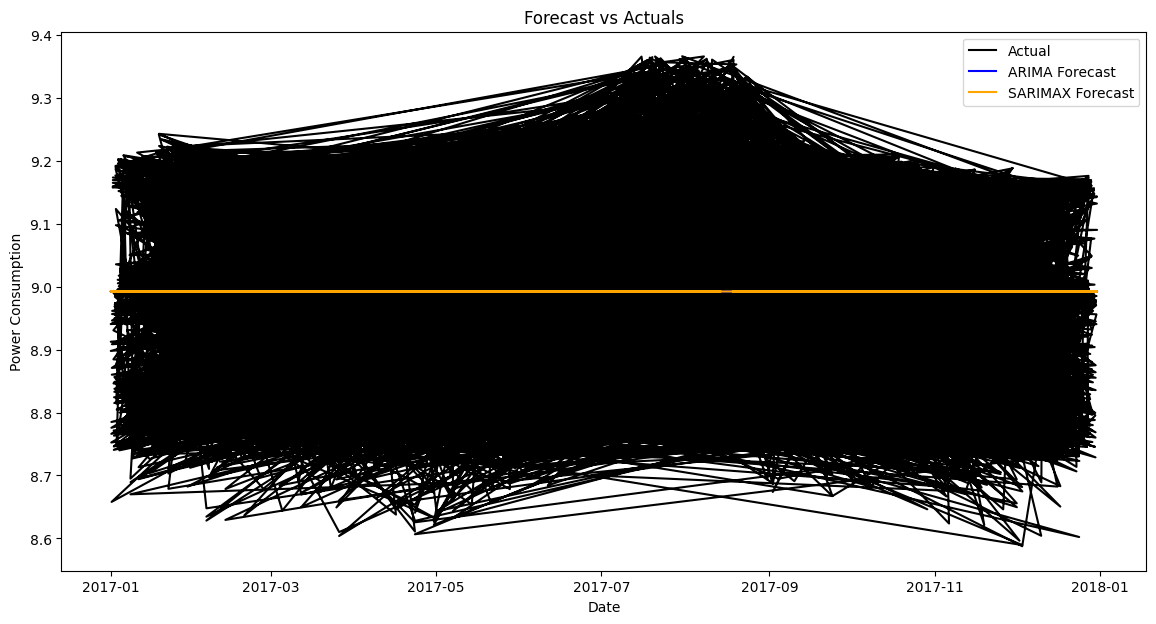

In [70]:
# Plotting results
plt.figure(figsize=(14, 7))
plt.plot(x_test.index, y_test, label='Actual', color='black')  # Actual values
plt.plot(x_test.index, arima_pred, label='ARIMA Forecast', color='blue')  # ARIMA forecast
plt.plot(x_test.index, sarimax_pred, label='SARIMAX Forecast', color='orange')  # SARIMAX forecast
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()


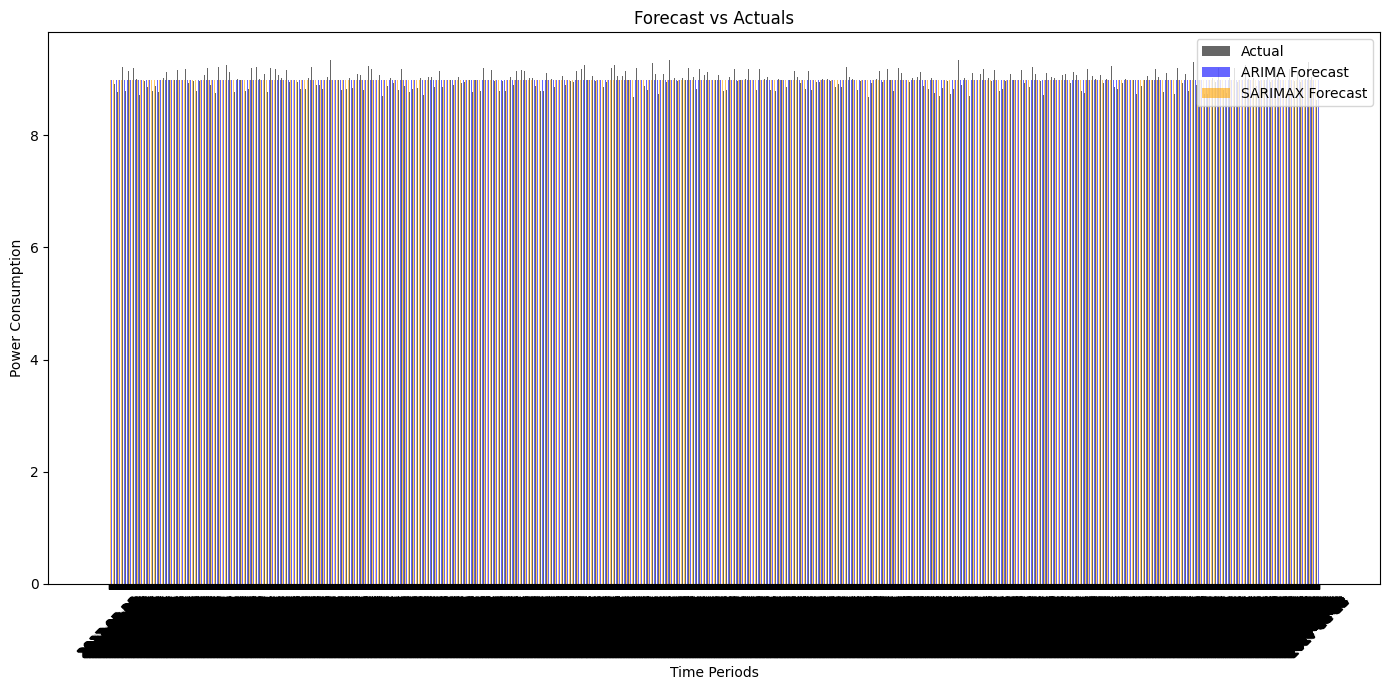

In [71]:
# Prepare the x-axis positions
x_positions = np.arange(len(x_test))

# Create the bar width
bar_width = 0.25

# Plotting results using bar charts
plt.figure(figsize=(14, 7))

# Actual values
plt.bar(x_positions, y_test, width=bar_width, label='Actual', color='black', alpha=0.6)

# ARIMA forecast
plt.bar(x_positions + bar_width, arima_pred, width=bar_width, label='ARIMA Forecast', color='blue', alpha=0.6)

# SARIMAX forecast
plt.bar(x_positions + 2 * bar_width, sarimax_pred, width=bar_width, label='SARIMAX Forecast', color='orange', alpha=0.6)

# Adding titles and labels
plt.title('Forecast vs Actuals')
plt.xlabel('Time Periods')
plt.ylabel('Power Consumption')
plt.xticks(x_positions + bar_width, x_test.index.date, rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()
